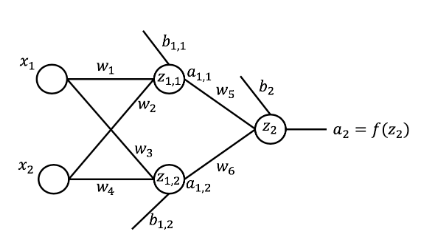

In [8]:
import numpy as np
np.random.seed(42)
weights =np.around(np.random.uniform(size=6),decimals=2)
biases=np.around(np.random.uniform(size=3),decimals=2)
weights,biases

(array([0.37, 0.95, 0.73, 0.6 , 0.16, 0.16]), array([0.06, 0.87, 0.6 ]))

In [9]:
x_1=0.5
x_2=0.85

In [11]:
z_11=x_1*weights[0]+x_2*weights[1]+biases[0]
z_11

1.0525

In [13]:
z_12=x_1*weights[2]+x_2*weights[3]+biases[1]
z_12

1.745

In [17]:
a_11=1.0/(1.0+np.exp(-z_11))
a_12=1.0/(1.0+np.exp(-z_12))
a_11,a_12

(0.7412546787548828, 0.8513210454160925)

In [18]:
z_2=a_11*weights[4]+a_12*weights[5]+biases[2]
z_2

0.8548121158673561

In [19]:
a_2=1.0/(1.0+np.exp(-z_2))

In [20]:
a_2

0.7015756183173099

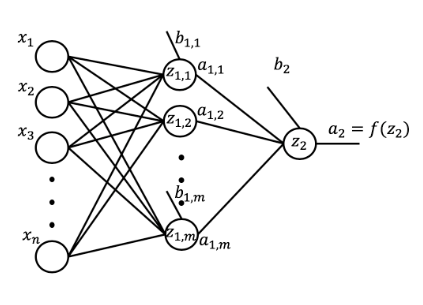

# Initialize a network

In [28]:
n=2 # number of inputs 
num_hidden_layers=2
m=[2,2] # number of nodes in each hidden layer
num_nodes_output=1 # number of nodes in the output layer

In [29]:
import numpy as np

In [31]:
num_nodes_previous = n
network={}
for layer in range(num_hidden_layers+1):
    if layer==num_hidden_layers:
        layer_name='output'
        num_nodes=num_nodes_output
    else:
        layer_name=f'Layer_{layer+1}'
        num_nodes=m[layer]

    # initialize weights and biases associated with each node in the current layer
    network[layer_name]={}
    for node in range(num_nodes):
        node_name=f'node_{node+1}'
        network[layer_name][node_name]={
            'weights':np.around(np.random.uniform(size=num_nodes_previous),decimals=2),
            'bias':np.around(np.random.uniform(size=1),decimals=2),
        }
    num_nodes_previous=num_nodes
network

{'Layer_1': {'node_1': {'weights': array([0.46, 0.79]), 'bias': array([0.2])},
  'node_2': {'weights': array([0.51, 0.59]), 'bias': array([0.05])}},
 'Layer_2': {'node_1': {'weights': array([0.61, 0.17]), 'bias': array([0.07])},
  'node_2': {'weights': array([0.95, 0.97]), 'bias': array([0.81])}},
 'output': {'node_1': {'weights': array([0.3, 0.1]), 'bias': array([0.68])}}}

In [49]:
def initialize_network(num_inputs,num_hidden_layers,num_nodes_hidden, num_nodes_output):
    num_nodes_previous=num_inputs # number of nodes in the previous layer
    network={}
    for layer in range(num_hidden_layers+1):
        if layer==num_hidden_layers:
            layer_name='output'
            num_nodes=num_nodes_output
        else:
            layer_name=f'layer_{layer+1}'
            num_nodes=num_nodes_hidden[layer]
            
        network[layer_name]={}
        for node in range(num_nodes):
            node_name=f'node_{node+1}'
            
            network[layer_name][node_name]={
                'weight':np.around(np.random.uniform(size=num_nodes_previous),decimals=2),
                'bias':np.around(np.random.uniform(size=1),decimals=2),
            }
        num_nodes_previous=num_nodes
    return network
        

In [66]:
small_network=initialize_network(5,3,[3,2,3],1)

# compute the weighted sum at each node

In [59]:
def compute_weighted_sum(inputs,weights,bias):
    return np.sum(inputs * weights) + bias

In [67]:
from random import seed
import numpy as np

np.random.seed(12)
input=np.around(np.random.uniform(size=5),decimals=2)
print(f'The inputs to the network are {input}')
small_network

The inputs to the network are [0.15 0.74 0.26 0.53 0.01]


{'layer_1': {'node_1': {'weight': array([0.92, 0.9 , 0.03, 0.96, 0.14]),
   'bias': array([0.28])},
  'node_2': {'weight': array([0.61, 0.94, 0.85, 0.  , 0.52]),
   'bias': array([0.55])},
  'node_3': {'weight': array([0.49, 0.77, 0.16, 0.76, 0.02]),
   'bias': array([0.14])}},
 'layer_2': {'node_1': {'weight': array([0.12, 0.31, 0.67]),
   'bias': array([0.47])},
  'node_2': {'weight': array([0.82, 0.29, 0.73]), 'bias': array([0.7])}},
 'layer_3': {'node_1': {'weight': array([0.33, 0.33]), 'bias': array([0.98])},
  'node_2': {'weight': array([0.62, 0.95]), 'bias': array([0.77])},
  'node_3': {'weight': array([0.83, 0.41]), 'bias': array([0.45])}},
 'output': {'node_1': {'weight': array([0.4 , 1.  , 0.18]),
   'bias': array([0.96])}}}

In [72]:
node_weights=small_network['layer_1']['node_1']['weight']
node_bias=small_network['layer_1']['node_1']['bias']
print(node_weights)
weighted_sum=compute_weighted_sum(input,node_weights,node_bias)
print(weighted_sum)
print('The weighted sum at the first node in the hidden layer is {}'.format(np.around(weighted_sum[0], decimals=4)))

[0.92 0.9  0.03 0.96 0.14]
[1.602]
The weighted sum at the first node in the hidden layer is 1.602


# compute node activation

In [74]:
def node_activation(weighted_sum):
    return 1.0/(1.0+np.exp(-1 * weighted_sum))

In [75]:
node_output=node_activation(compute_weighted_sum(input,node_weights,node_bias))
print('The output of the first node in the hidden layer is {}'.format(np.around(node_output[0], decimals=4)))

The output of the first node in the hidden layer is 0.8323


# forward propogation

In [85]:
def forward_propagate(network,inputs):
    layer_inputs=list(inputs)
    for layer in network:
        layer_data=network[layer]
        layer_outputs=[]
        # print(layer_data)
        for layer_node in layer_data:
            node_data=layer_data[layer_node]
            print(node_data)
            node_output=node_activation(compute_weighted_sum(layer_inputs,node_data['weight'],node_data['bias']))
            layer_outputs.append(np.around(node_output[0],decimals=4))
        if layer!='output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))
        layer_inputs=layer_outputs
    network_predictions=layer_outputs
    return network_predictions 

In [86]:
predictions = forward_propagate(small_network, input)
print('The predicted value by the network for the given input is {}'.format(np.around(predictions[0], decimals=4)))

{'weight': array([0.92, 0.9 , 0.03, 0.96, 0.14]), 'bias': array([0.28])}
{'weight': array([0.61, 0.94, 0.85, 0.  , 0.52]), 'bias': array([0.55])}
{'weight': array([0.49, 0.77, 0.16, 0.76, 0.02]), 'bias': array([0.14])}
The outputs of the nodes in hidden layer number 1 is [0.8323, 0.8268, 0.7735]
{'weight': array([0.12, 0.31, 0.67]), 'bias': array([0.47])}
{'weight': array([0.82, 0.29, 0.73]), 'bias': array([0.7])}
The outputs of the nodes in hidden layer number 2 is [0.7932, 0.8991]
{'weight': array([0.33, 0.33]), 'bias': array([0.98])}
{'weight': array([0.62, 0.95]), 'bias': array([0.77])}
{'weight': array([0.83, 0.41]), 'bias': array([0.45])}
The outputs of the nodes in hidden layer number 3 is [0.8232, 0.8924, 0.8141]
{'weight': array([0.4 , 1.  , 0.18]), 'bias': array([0.96])}
The predicted value by the network for the given input is 0.9112


In [87]:
input

array([0.15, 0.74, 0.26, 0.53, 0.01])